In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')

In [64]:
train.head()
#print(train.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


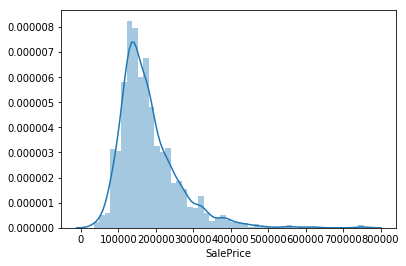

In [6]:
sns.distplot(train['SalePrice'])

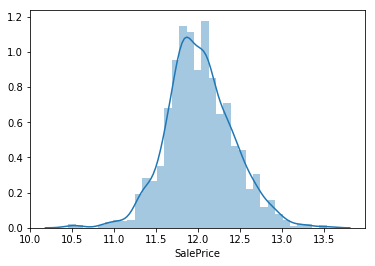

In [36]:
import scipy.stats as stat
sns.distplot(np.log(train['SalePrice']))
#sns.distplot(train['SalePrice'],fit=stat.lognorm)

In [8]:
print('Skewness',format(train['SalePrice'].skew()))
print('Kurtosis',format(train['SalePrice'].kurt()))

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


In [45]:
train.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

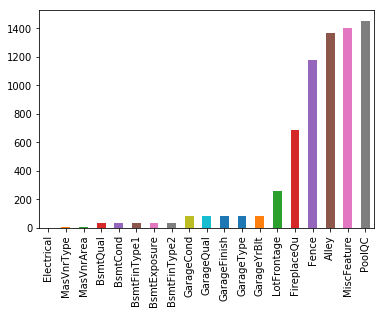

In [32]:
x=train.isna().sum()
#print(x)
type(x)
missing =x[x>0]
missing.sort_values().plot.bar()

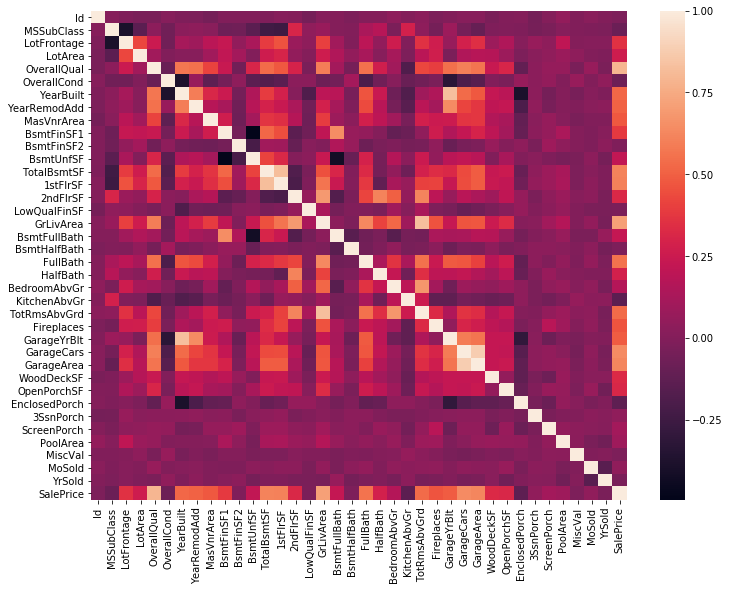

In [46]:
corr = train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr)

In [74]:
cols =corr.nlargest(10, 'SalePrice')['SalePrice'].index
cols
#corr.sort_values(by='SalePrice',ascending=False).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

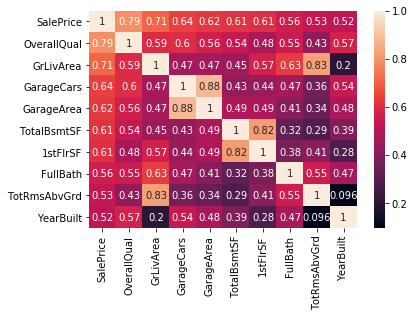

In [69]:
sns.heatmap(train[cols].corr(),annot=True)

# As you can see there is mulicollinearity between GarageCars and GarageArea

&&& Also There is high collinearity Between TotalBsmtSF and 1stFrSF . Also there is multicoliinaerity between TotalRms AbvGrd and GrlivArea

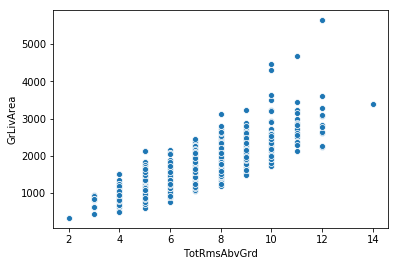

In [71]:
sns.scatterplot(x=train['TotRmsAbvGrd'],y=train['GrLivArea'])

# Here we can see OverallQuality, TotalBsmtSD,1stFlrSF,GrLivArea,GarageCars and Garage Area have high correlation with Price

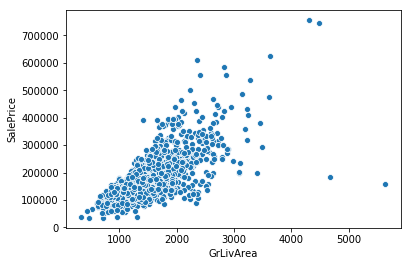

In [37]:
sns.scatterplot(x=train['GrLivArea'],y=train['SalePrice'])

There are some Outliers in GrLive Area ( Above Ground Living Area)

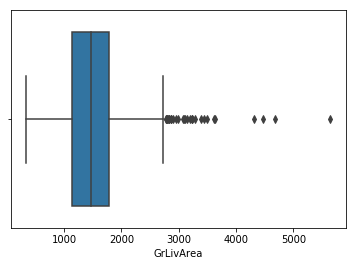

In [39]:
sns.boxplot(train['GrLivArea'])

To See The Relation Between Overall Quality and Sale Price as they are highly correlated 

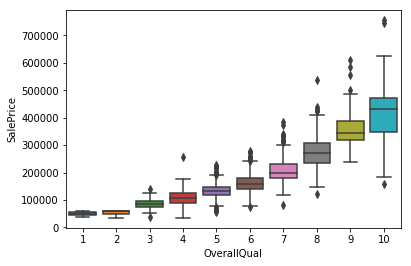

In [44]:
sns.boxplot(x=train['OverallQual'],y=train['SalePrice'])
#sns.scatterplot(x=train['OverallQual'],y=train['SalePrice'])

Now Amongst the Collinear Terms the one which has the highest Correlation with Sale pRice will be considered. And See which other variables have high correlation include those

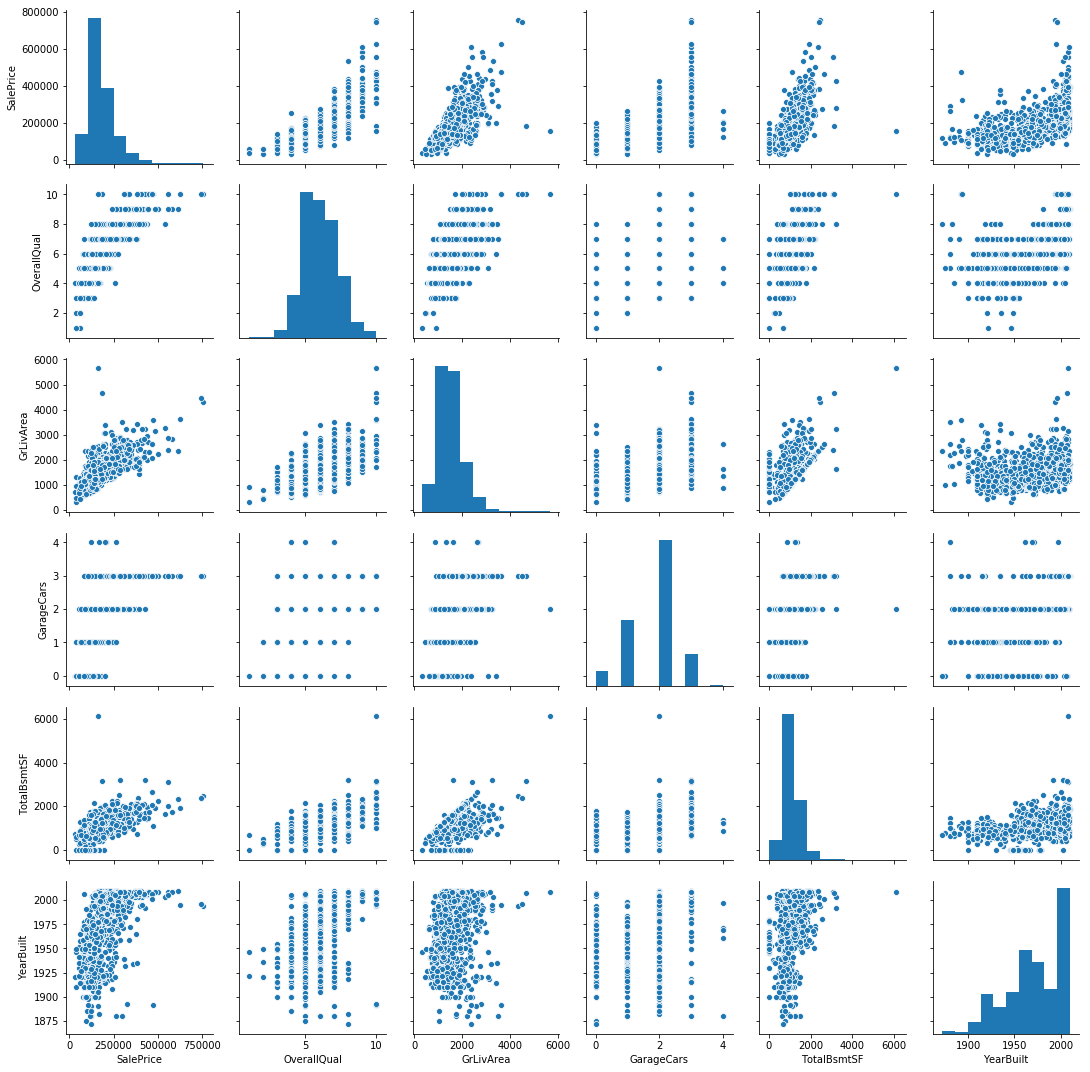

In [75]:
refurbished_cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(train[refurbished_cols])

# Now See that BsmtArea and To GrLivArea in the above plot. The Basement aArea can never be bigger than ground.

In [101]:
total=pd.DataFrame({'Total':train.isna().sum().sort_values(ascending=False),'Percentage' : (train.isna().sum()/train.isna().count()).sort_values(ascending=False) })

In [103]:
total.head()

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
